In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('/content/drive/MyDrive/Data/train_loan.csv')

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
data['Credit_History'].unique()

array([ 1.,  0., nan])

In [8]:
data['Credit_History'].value_counts(normalize = True)

,proportion
Credit_History,
1.0,0.842199
0.0,0.157801


In [9]:
data.duplicated().sum()

0

In [10]:
data.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [11]:
data= data.dropna()

In [12]:
data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [14]:
data['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
3+,41


In [15]:
data = data.replace(to_replace='3+', value=4)

In [16]:
data.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

<ipython-input-16-34bdd2538454>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},


In [17]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,Y
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,Y


In [44]:
from sklearn.linear_model import LogisticRegression
x = data.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y = data['Loan_Status']

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,stratify=y,random_state=2)

In [46]:
log = LogisticRegression()

In [47]:
log.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
y_pred = log.predict(x_test)

In [49]:
y_test

,Loan_Status
368,Y
74,Y
135,N
53,N
96,Y
388,Y
345,Y
8,Y
549,Y
99,Y


In [50]:
y_pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N',
       'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N'], dtype=object)

In [32]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [51]:
confusion_matrix(y_test,y_pred)

array([[ 9,  6],
       [ 2, 31]])

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.fit_transform(x_test)

In [54]:
model1 = LogisticRegression()
model1.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [55]:
y_pred_sc = model1.predict(x_test)

In [56]:
confusion_matrix(y_test,y_pred_sc)

array([[ 9,  6],
       [ 2, 31]])

In [57]:
accuracy_score(y_test,y_pred_sc)

0.8333333333333334

KNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
metrik_k = []
neighbors = np.arange(3,15)

for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier.fit(x_train,y_train)
  y_pred = classifier.predict(x_test)
  acc = accuracy_score(y_test,y_pred)
  metrik_k.append(acc)

In [60]:
metrik_k

[0.7083333333333334,
 0.6666666666666666,
 0.6666666666666666,
 0.6458333333333334,
 0.6666666666666666,
 0.625,
 0.7083333333333334,
 0.6666666666666666,
 0.6875,
 0.6875,
 0.7291666666666666,
 0.7083333333333334]

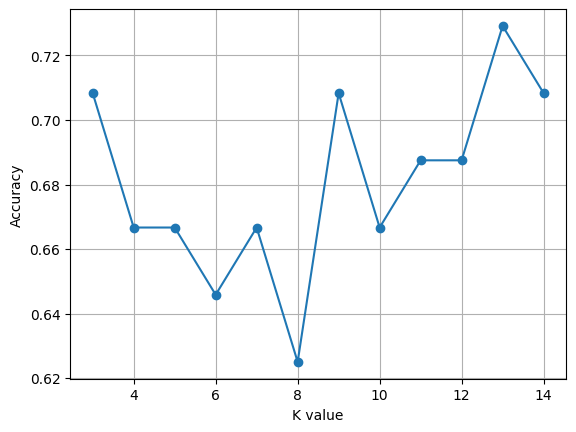

In [61]:
plt.plot(neighbors,metrik_k,'o-')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [62]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [63]:
y_pred_knn = classifier.predict(x_test)
accuracy_score(y_test,y_pred_knn)

0.6666666666666666

In [66]:
metrik_k = []
neighbors = np.arange(3,15)

for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier.fit(x_train_sc,y_train)
  y_pred = classifier.predict(x_test_sc)
  acc = accuracy_score(y_test,y_pred)
  metrik_k.append(acc)

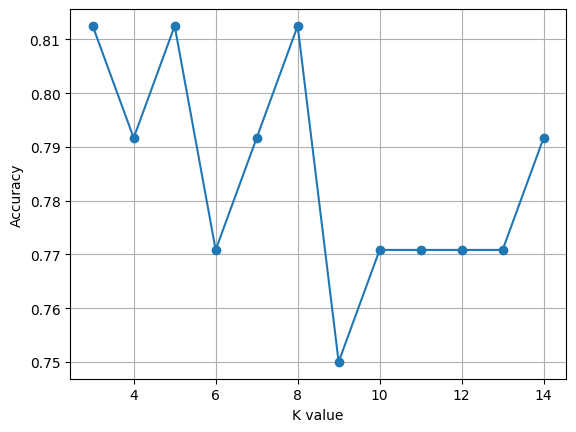

In [67]:
plt.plot(neighbors,metrik_k,'o-')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [68]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train_sc,y_train)

KNeighborsClassifier(n_neighbors=3)

In [69]:
y_pred_knn_sc = classifier.predict(x_test_sc)
accuracy_score(y_test,y_pred_knn_sc)

0.8125

In [70]:
from sklearn.svm import SVC
sv = SVC()

In [71]:
sv.fit(x_train,y_train)
y_pred_sv = sv.predict(x_test)
accuracy_score(y_test,y_pred_sv)

0.6875

In [72]:
confusion_matrix(y_test,y_pred_sv)

array([[ 0, 15],
       [ 0, 33]])

In [73]:
sv.fit(x_train_sc,y_train)
y_pred_sv_sc = sv.predict(x_test_sc)
accuracy_score(y_test,y_pred_sv_sc)

0.8333333333333334

In [74]:
confusion_matrix(y_pred_sv_sc,y_test)

array([[ 9,  2],
       [ 6, 31]])

In [75]:
sv1 = SVC(kernel = "poly",degree=3)
sv1.fit(x_train,y_train)
y_pred_sv1 = sv1.predict(x_test)
accuracy_score(y_test,y_pred_sv1)

0.6875

In [76]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred_gnb = gnb.predict(x_test)
accuracy_score(y_test,y_pred_gnb)

0.8333333333333334

In [77]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
clf = DecisionTreeClassifier(criterion = 'entropy')

In [79]:
clf.fit(x_train,y_train)
y_pred_dt = clf.predict(x_test)
accuracy_score(y_test,y_pred_dt)

0.7083333333333334

In [80]:
clf1 = DecisionTreeClassifier(criterion = 'entropy')
clf1.fit(x_train_sc,y_train)
y_pred_dt_sc = clf1.predict(x_test_sc)
accuracy_score(y_test,y_pred_dt_sc)

0.5833333333333334

In [81]:
clf.classes_

array(['N', 'Y'], dtype=object)

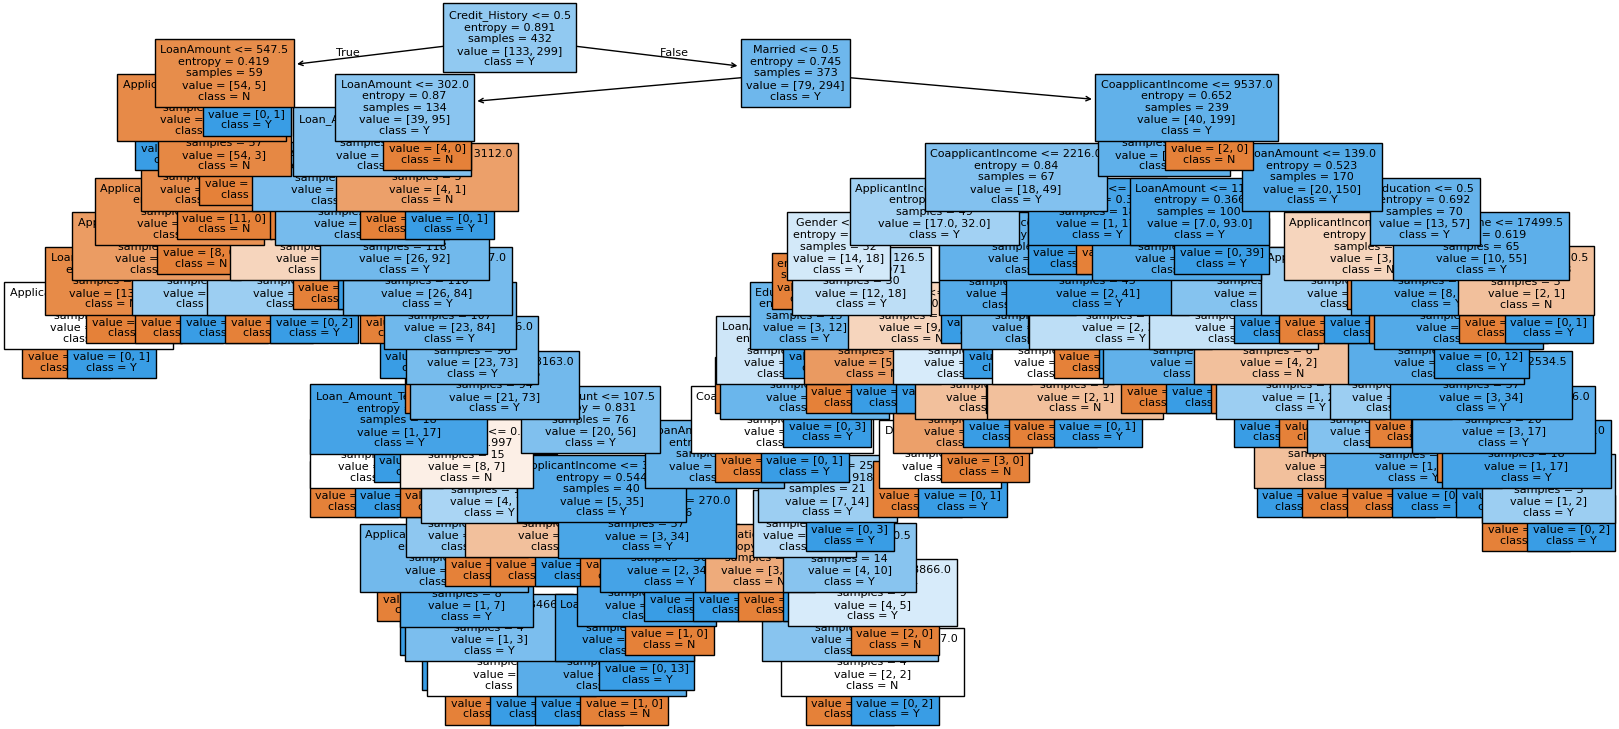

In [82]:
from sklearn import tree
plt.figure(figsize=(20,9))
tree.plot_tree(clf, feature_names = x_train.columns,
               class_names = clf.classes_.astype('str'),
               filled = True,
               fontsize=8)
plt.show()

In [83]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [84]:
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
accuracy_score(y_test,y_pred_rf)

0.8333333333333334